In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

## Regular Experiments

In [33]:
csv_experiments_path = 'all_results.csv'
df = pd.read_csv(csv_experiments_path)

# columns are: SEED,PLANNING_EXPERIMENT,INPLACE,MOVING,ADVERSARIAL,OBSTACLES,Time,Distance
# we want to group by all columns except seed, and then take the mean of the time and distance columns
grouped = df.groupby(['PLANNING_EXPERIMENT', 'INPLACE', 'MOVING', 'ADVERSARIAL', 'OBSTACLES']).mean()
grouped

SEED        Time  \
PLANNING_EXPERIMENT INPLACE MOVING ADVERSARIAL OBSTACLES                     
1                   False   False  False       False         2  429.418667   
                            True   False       False         2  327.552000   
                    True    False  False       False         2   76.629333   
                                   True        False         2  250.730667   
                            True   False       False         2  251.498667   
2                   False   False  False       False         2  191.658667   
                            True   False       False         2  223.936000   
                    True    False  False       False         2   69.866667   
                                   True        False         2  142.485333   
                            True   False       False         2  191.765333   
4                   False   False  False       False         2  181.077333   
                            True   False       False         2  289.194667   
                    True    False  False       False         2   69.866667   
                                   True        False         2  259.904000   
                            True   False       False         2  153.429333   

                                                            Distance  
PLANNING_EXPERIMENT INPLACE MOVING ADVERSARIAL OBSTACLES              
1                   False   False  False       False      159.677348  
                            True   False       False      119.422997  
                    True    False  False       False       32.902041  
                                   True        False      110.658653  
                            True   False       False       96.466258  
2                   False   False  False       False       67.664033  
                            True   False       False       69.181879  
                    True    False  False       False       28.166194  
                                   True        False       53.273558  
                            True   False       False       73.091411  
4                   False   False  False       False       64.457312  
                            True   False       False       88.373020  
                    True    False  False       False       28.166194  
                                   True        False       98.017675  
                            True   False       False       60.988767

## Ablation Study

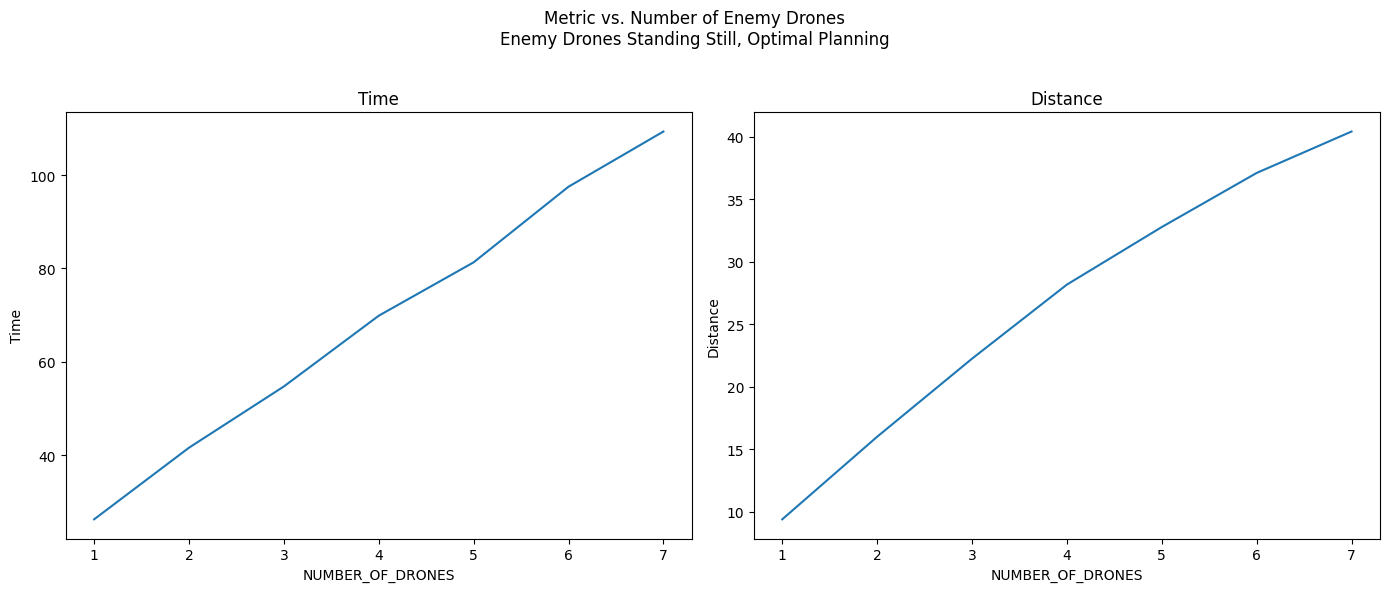

In [34]:
csv_ablation_study_path = 'all_results_study.csv'
df_ablation = pd.read_csv(csv_ablation_study_path)

# columns are: NUMBER_OF_DRONES,SEED,PLANNING_EXPERIMENT,INPLACE,MOVING,ADVERSARIAL,OBSTACLES,Time,Distance
# For each number of drones and the rest of the columns, we want to group by all columns except seed, and then take the mean of the time and distance columns

grouped_ablation = df_ablation.groupby(['NUMBER_OF_DRONES', 'PLANNING_EXPERIMENT', 'INPLACE', 'MOVING', 'ADVERSARIAL', 'OBSTACLES']).mean()
grouped_ablation

# Loop through all combinations of the levels in the grouped_ablation DataFrame
for experiment in grouped_ablation.index.levels[1]:
    for inplace in grouped_ablation.index.levels[2]:
        for moving in grouped_ablation.index.levels[3]:
            for adversarial in grouped_ablation.index.levels[4]:
                for obstacles in grouped_ablation.index.levels[5]:
                    # Create a figure with two subplots (side by side)
                    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
                    #fig.suptitle(f'Metric vs. Number of Enemy Drones\nplanning exp: {experiment} - inplace: {inplace} - moving: {moving} - adversarial: {adversarial} - obstacles: {obstacles}', fontsize=16)
                    fig.suptitle(f'Metric vs. Number of Enemy Drones\nEnemy Drones Standing Still, Optimal Planning')
                    for i, metric in enumerate(['Time', 'Distance']):
                        # Select the subplot (axis) for each metric
                        ax = axes[i]

                        # Plot data for the selected metric
                        sns.lineplot(x='NUMBER_OF_DRONES', y=metric, 
                                     data=grouped_ablation.loc[(slice(None), experiment, inplace, moving, adversarial, obstacles), :].reset_index(), 
                                     ax=ax)
                        
                        # Set ticks to integers
                        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
                        
                        # Set title for each subplot
                        ax.set_title(f'{metric}')
                        
                    # Adjust layout to prevent overlapping titles/labels
                    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
                    plt.show()